## i. Introduction
Marchelly Gideon Tambunan

Dataset: Bank Customer Churn

Objective : Creating a model for predicting NGAB Bank costumers will churn or not.

Dataset URL: https://www.kaggle.com/datasets/santoshd3/bank-customers

Deployment URL: https://huggingface.co/spaces/gdntmbnn/Bank-Customer-Churn

# ii. Import Library

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import phik
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from feature_engine.transformation import BoxCoxTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import recall_score,classification_report,ConfusionMatrixDisplay
import joblib
import warnings
warnings.simplefilter("ignore")


# iii. Data Loading

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


Here we can see the data, we will drop the RowNumber, and Surname column because the column is define the index of our data and Surname column is doesn't need for Prediction.

In [5]:
df.drop(["RowNumber","Surname"], axis = 1, inplace=True)

We want to see information from each columns we got

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Here we can see that we have 3 columns with `object` data type, 2 columns with `float` data type, and 9 columns with `integer` data type

Let's see description from each column because we get the dataset from kaggle.com

|No|Column Name|Description|
|-|----|----|
|1|CustomerId|contains random values and has no effect on customer leaving the bank.|
|2|Surname|the surname of a customer has no impact on their decision to leave the bank.|
|3|CreditScore|can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.|
|4|Geography|a customer’s location can affect their decision to leave the bank.|
|5|Gender|it’s interesting to explore whether gender plays a role in a customer leaving the bank.|
|6|Age|this is certainly relevant, since older customers are less likely to leave their bank than younger ones.|
|7|Tenure|refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.|
|8|Balance|also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.|
|9|NumofProducts|refers to the number of products that a customer has purchased through the bank.<br> 1=CreditCard <br> 2=Insurance <br> 3=Apartment <br> 4=Enterprise|
|10|HasCrCard|denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. <br> 1=yes <br> 0=no|
|11|IsActiveMember|Active customers are less likely to leave the bank. <br> 1=yes <br> 0=no|
|12|EstimatedSalary|Is with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.|
|13|Exited|whether or not the customer left the bank. <br> 1=yes <br> 0=no|

then we want to check if there's any missing value

In [7]:
df.isnull().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

there's no missing value on our data

we will check if there's any duplicated data

In [8]:
df.duplicated().sum()

0

here we can see there's no duplicated data

next, we'll copy our dataframe into a new variable

In [9]:
data = df.copy()

# iv. Exploratory Data Analysis(EDA)

In this section, we will explore our data to get some insight from our data.

### Target Visualization

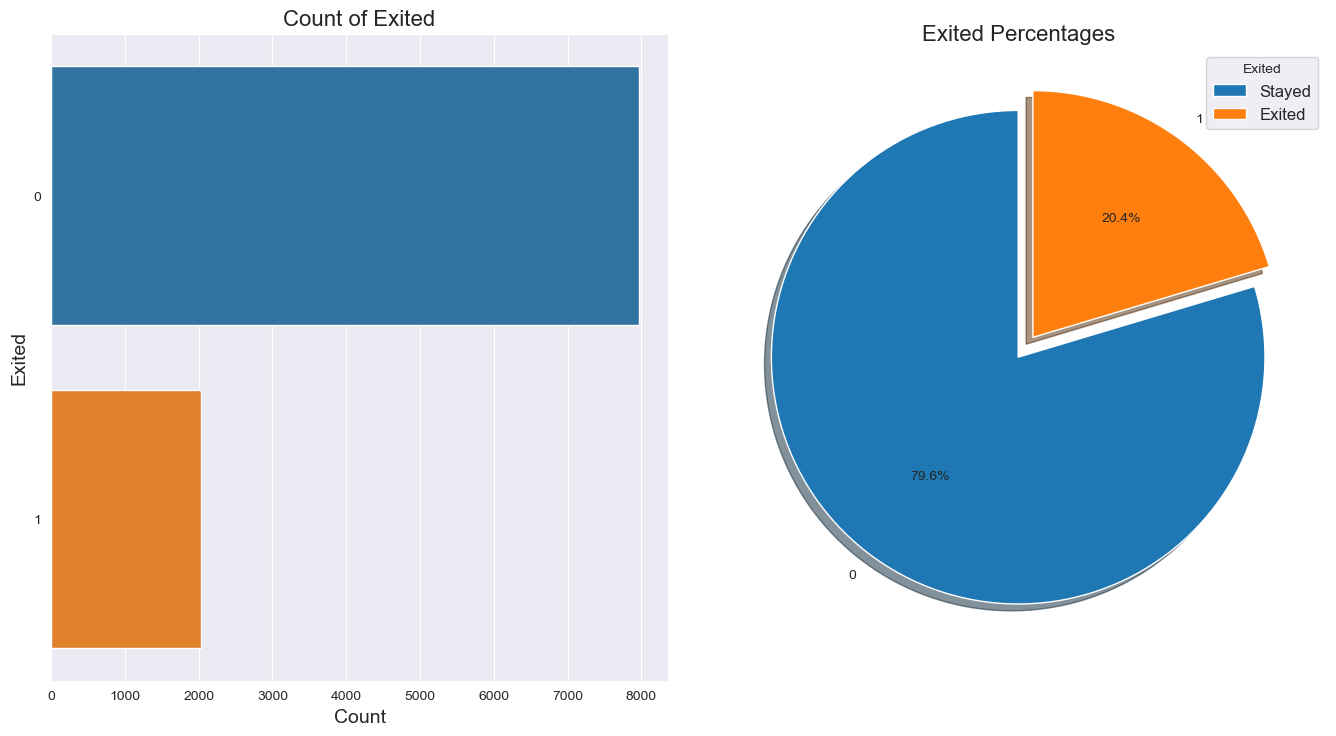

In [10]:
# Set figure size and style
plt.figure(figsize=(14, 8))
sns.set_style('darkgrid')

# Create subplot 1 for countplot
plt.subplot(1, 2, 1)
sns.countplot(y='Exited', data=data)
plt.title('Count of Exited', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Exited', fontsize=14)

# Create subplot 2 for pie chart
plt.subplot(1, 2, 2)
plt.pie(data.groupby('Exited').size(), 
        labels=data.groupby('Exited').size().index, 
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=90, 
        explode=(0, 0.1))
plt.title('Exited Percentages', fontsize=16)
plt.legend(title='Exited', loc='upper right', labels=['Stayed', 'Exited'], fontsize=12)

# Adjust layout and spacing
plt.tight_layout(pad=3)

# Show the plot
plt.show()


Here we can see that the target is `imbalance`. based on the visualization we made, that just has 20% data is exit(churn). we will handling the imbalance in feature preprocessing

Next, we want to see how many unique values from each columns

In [11]:
data.nunique()

CustomerId         10000
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

here we can see that we have some categorical columns are Geography, Gender, Tenure, NumofProducts, HasCrCard, and IsActiveMember

Then, we will our column for better Visualization

In [12]:
eda_num = ['CreditScore','Age', 'Balance','EstimatedSalary']
eda_cat = ['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']

### Categorical Visualization

Let's see some visualization about Categorical columns

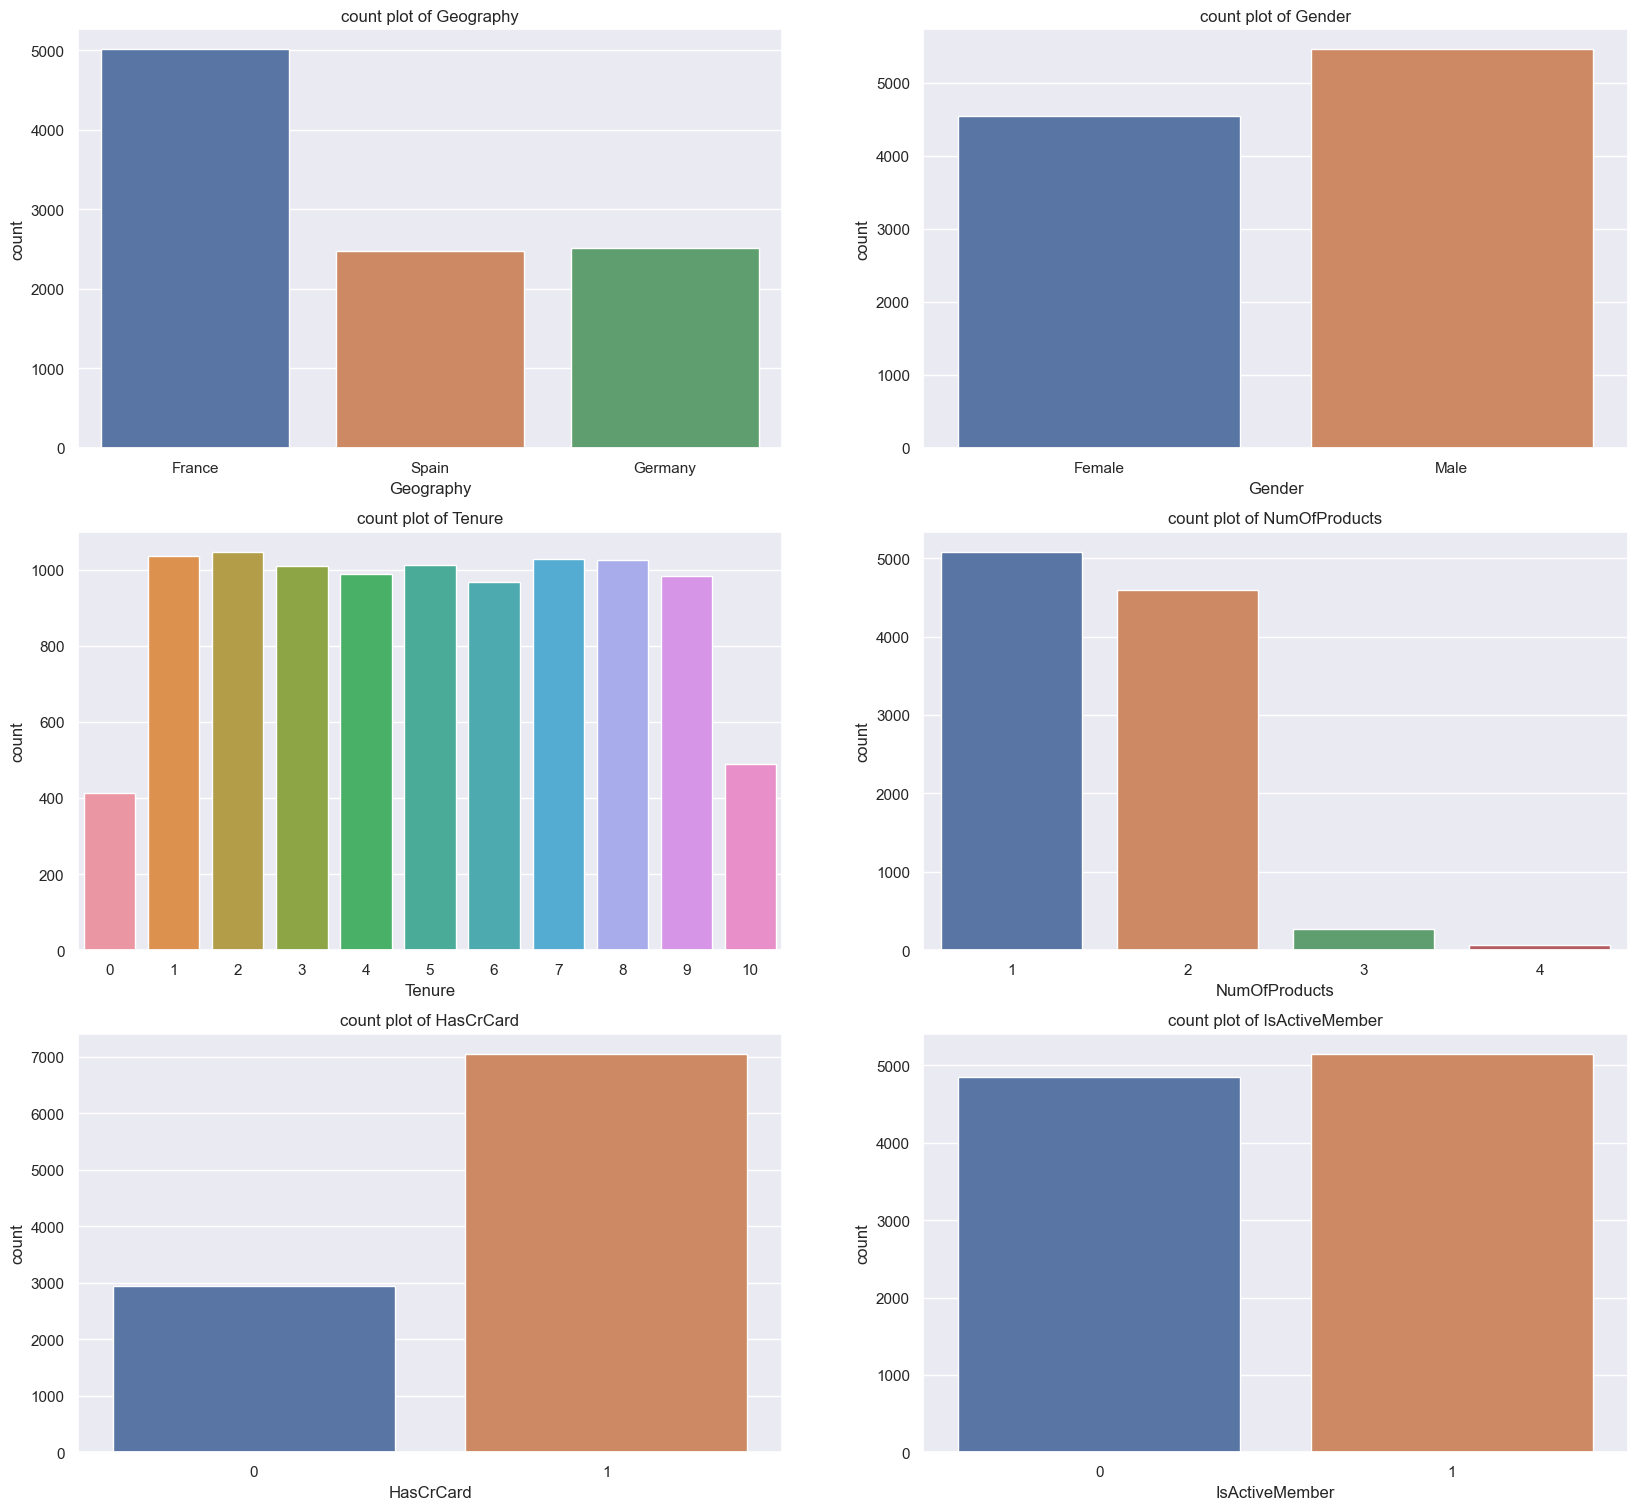

In [13]:
x = 1
plt.figure(figsize=(20,25))
sns.set(color_codes=True)
for col in eda_cat:
    plt.subplot(4,2,x)
    sns.countplot(df[col])
    plt.title(f'count plot of {col}')
    x+=1

Here's the visualization about our categorical column. From the Country column is dominated by France. Spain and Germany has about same data counts. From Gender column, Male and Female has little bit different from data count. From HasCrCard are dominated by 1 which means that some of our data has Credit Card. From IsActiveMember has little bit different from them. From, NumofProducts, we can see that's just from 1 and 2 is just dominated the column. From Tenure, we can see that has more variance but from 1 and 10 is the low against the other. next we want to see any insight of our data, From Exited column, we can see

### Numerical Visualization

Next, We want to see the visualization from Numerical column

Skewness of CreditScore : -0.07160660820092675
Skewness of Age : 1.0113202630234552
Skewness of Balance : -0.14110871094154384
Skewness of EstimatedSalary : 0.0020853576615585162


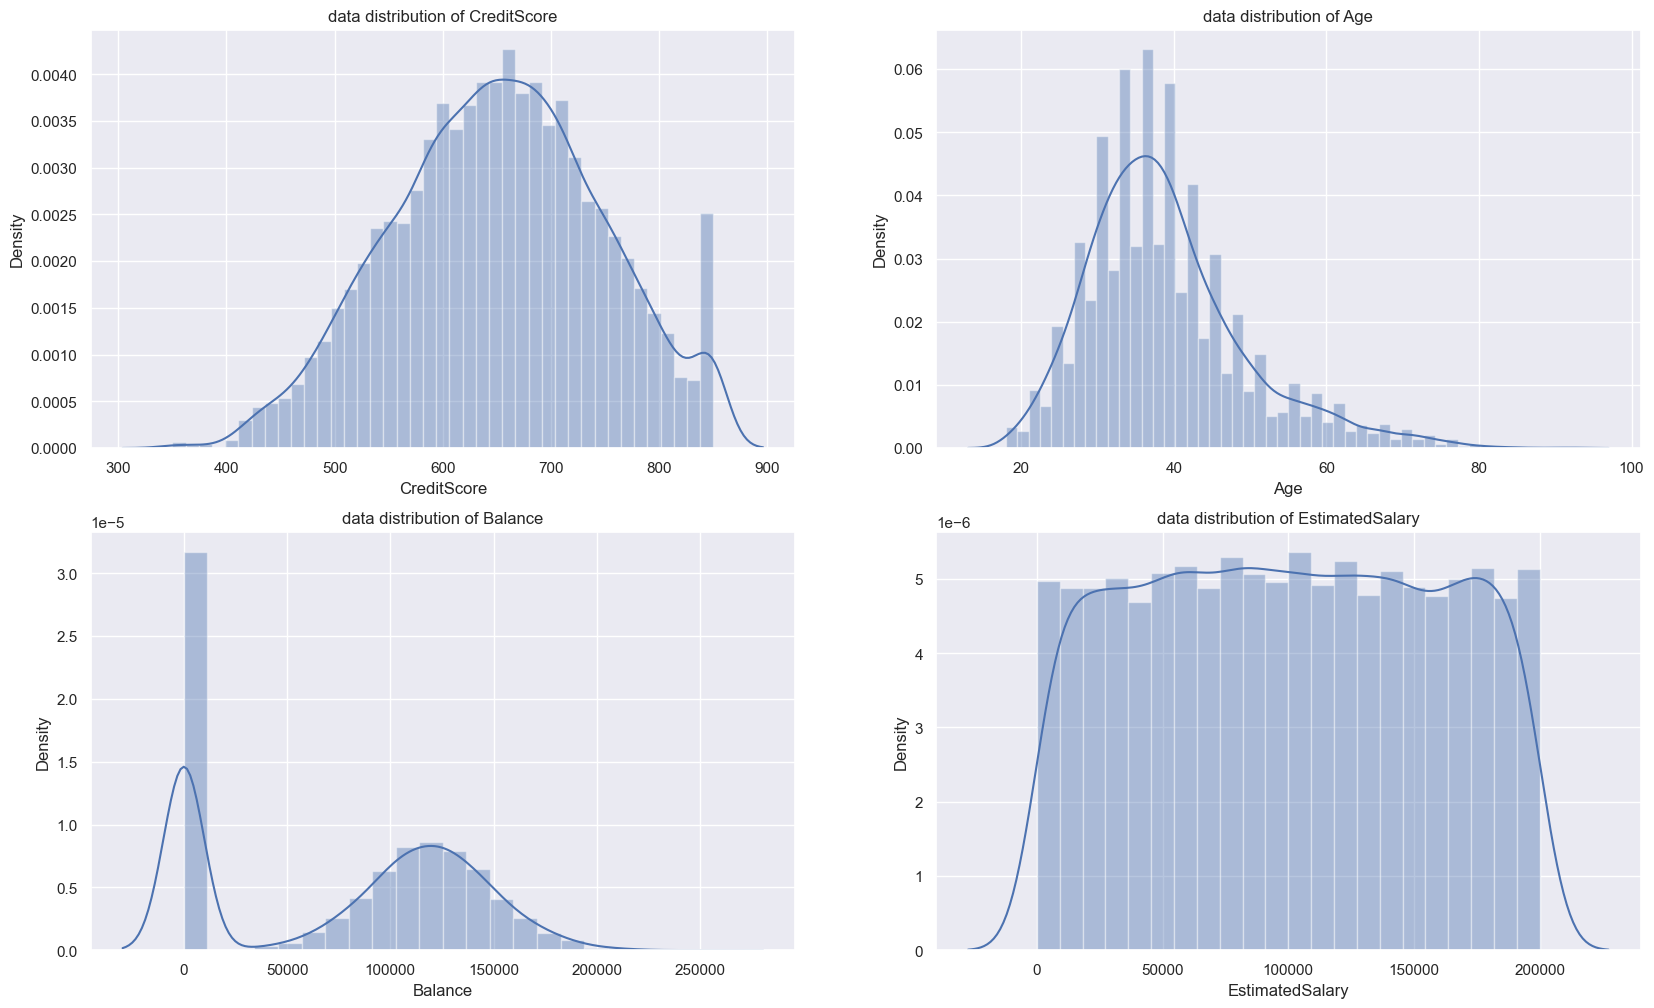

In [14]:
x = 1
plt.figure(figsize=(20,25))
sns.set(color_codes=True)
for col in eda_num:
    print(f'Skewness of {col} : {df[col].skew()}')
    plt.subplot(4,2,x)
    sns.distplot(df[col])
    plt.title(f'data distribution of {col}')
    x+=1

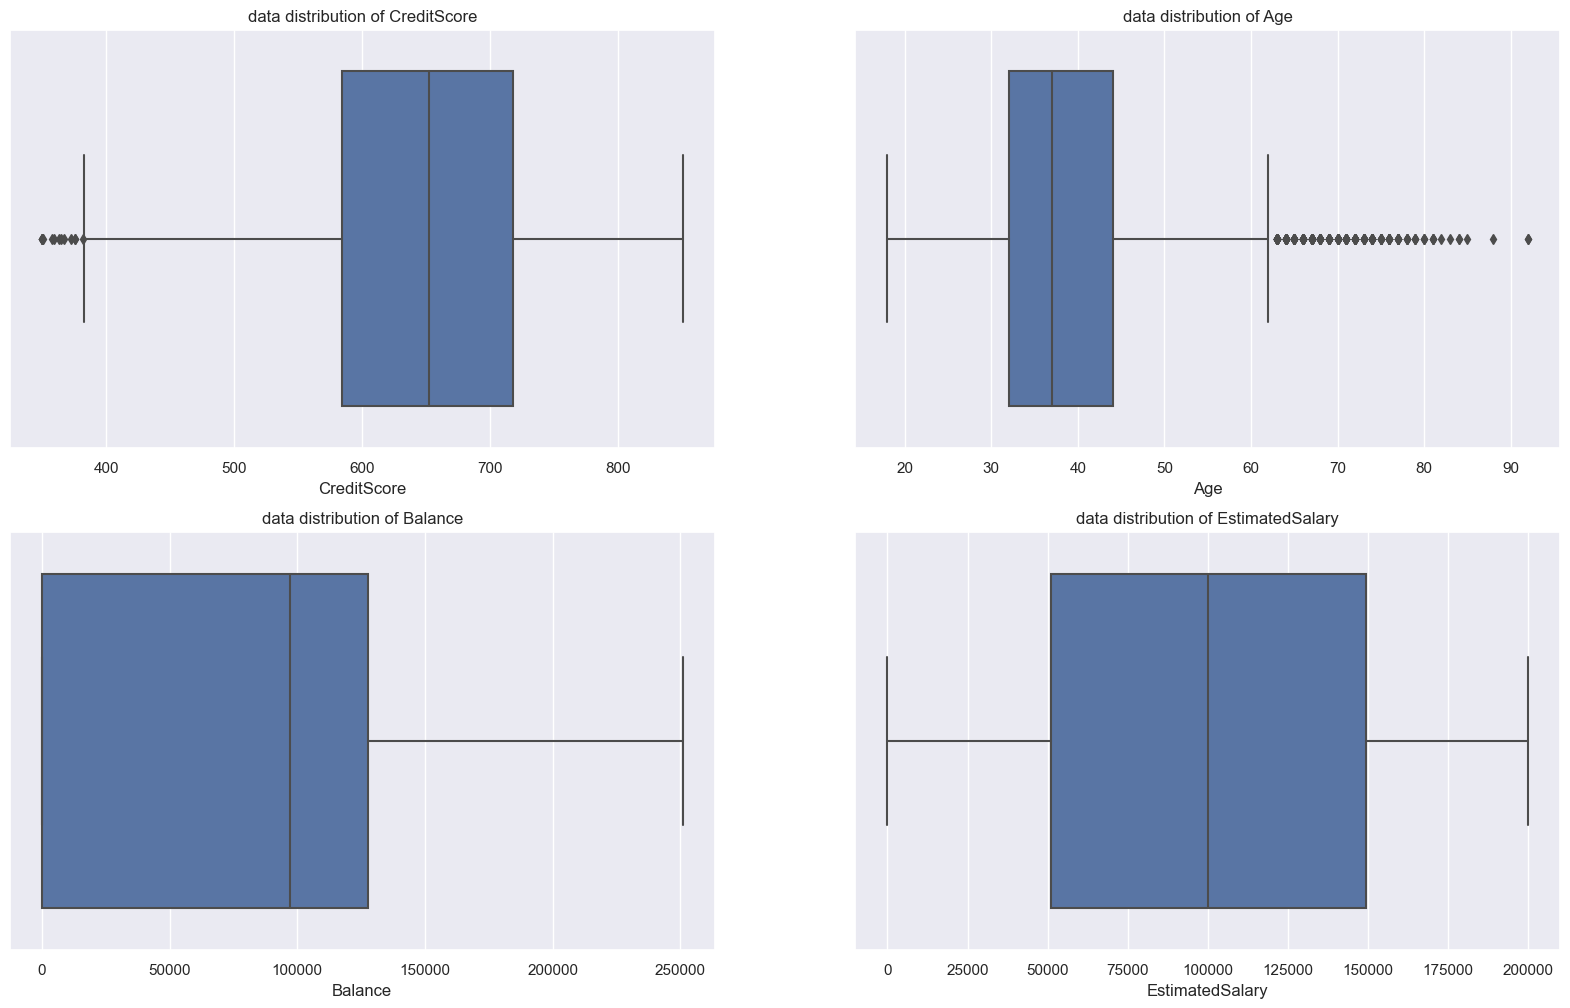

In [45]:
x = 1
plt.figure(figsize=(20,25))
sns.set(color_codes=True)
for col in eda_num:
    plt.subplot(4,2,x)
    sns.boxplot(df[col])
    plt.title(f'data distribution of {col}')
    x+=1

Here we can see visualization and skewness value of numerical column. From CreditScore column is normal with skewness value is -0,071. From Age column we can see that the data is not normal with skewness value 1.01 and from the visualization, Age is right skewed. From Balance column, we can see that the data is not normal from the visualization, maybe is because Most data in Balance is low. From EstimatedSalary we can see that the column is normall with skewness valus is 0.

### Categorical Against Target

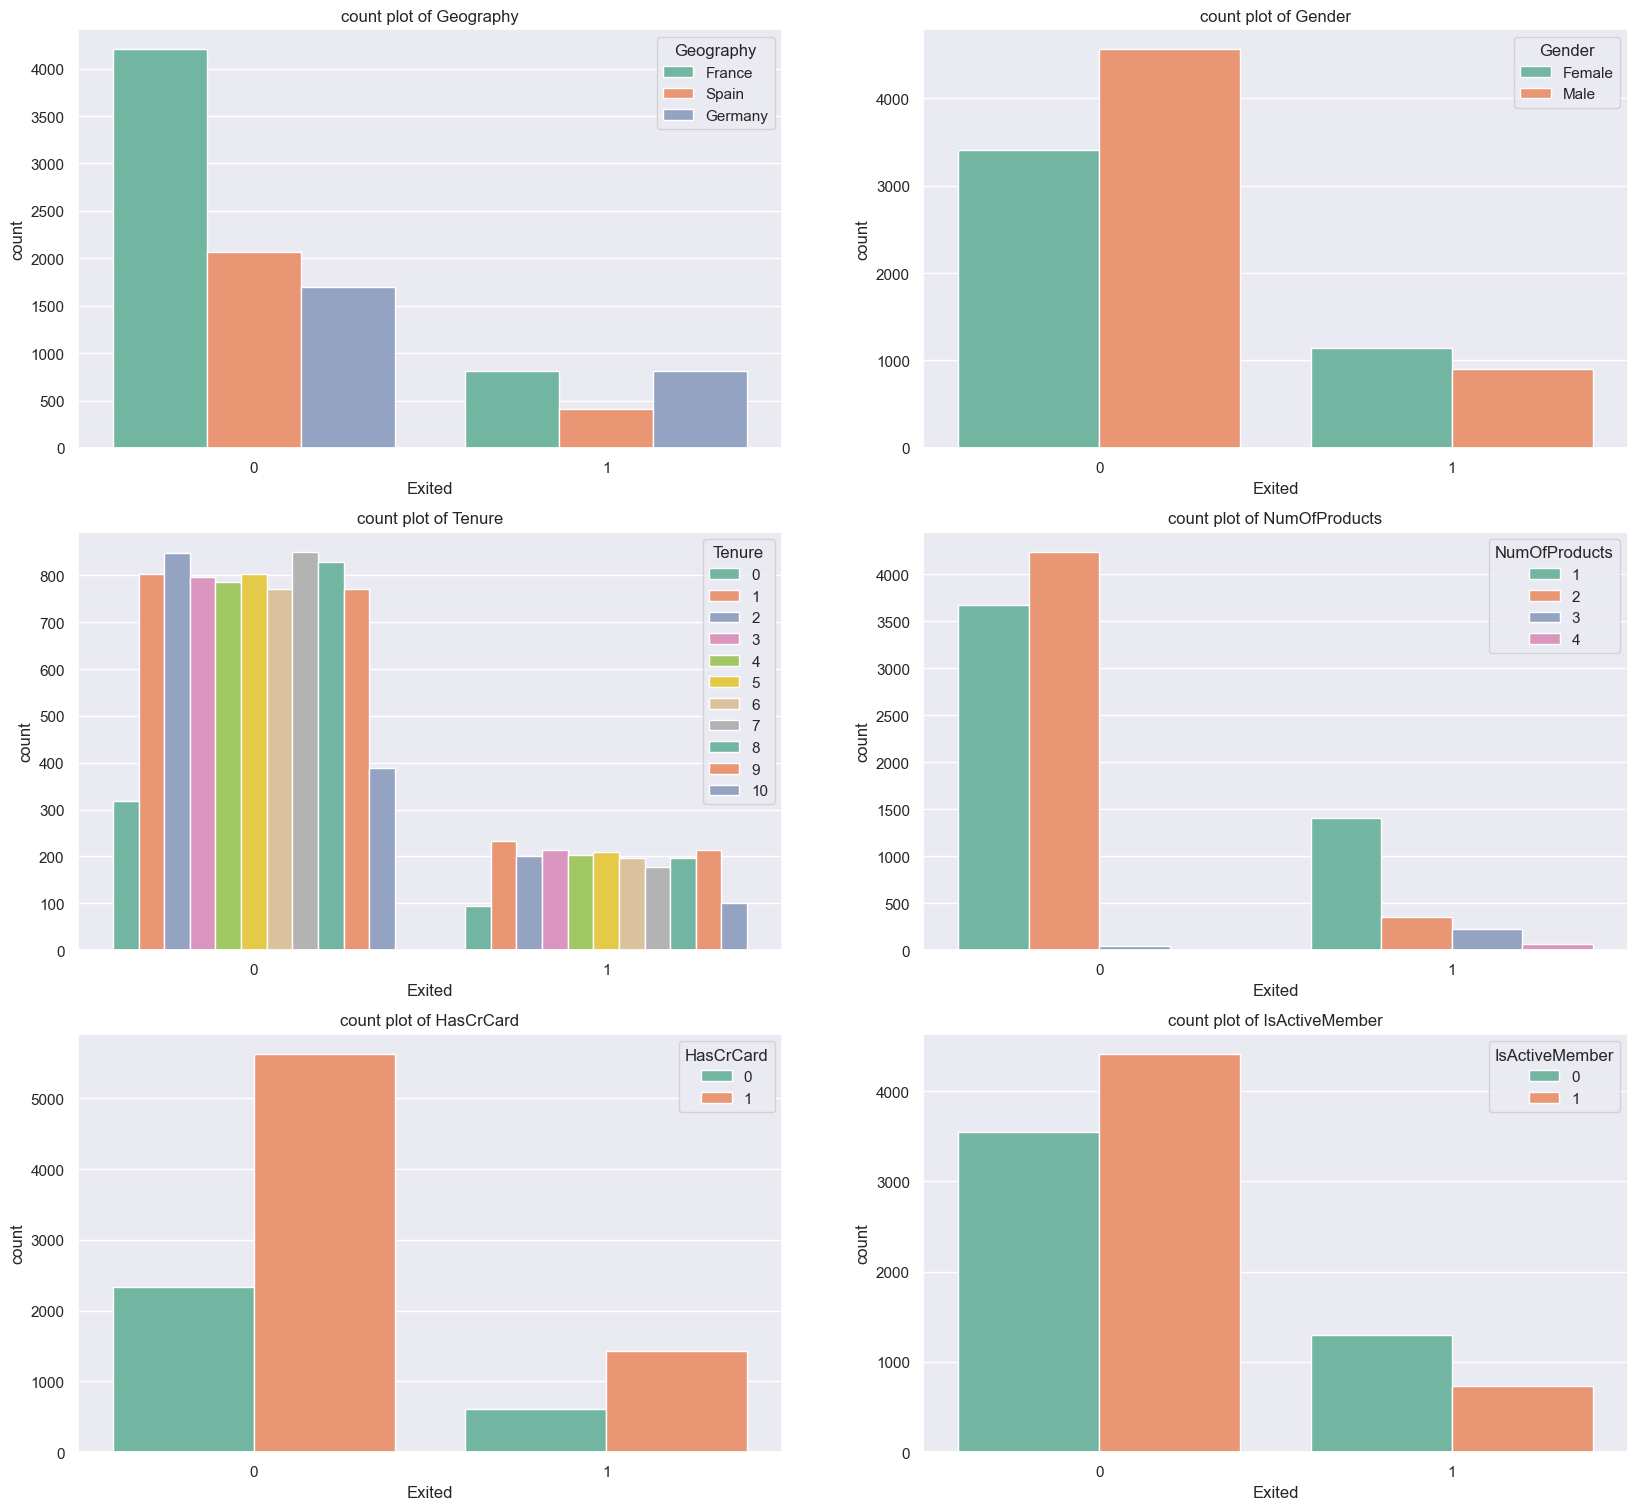

In [43]:
i = 1
plt.figure(figsize=(20,25))
sns.set(color_codes=True)
for col in eda_cat[:6]:
    plt.subplot(4,2,i)
    sns.countplot(x='Exited',hue=col,palette='Set2',data=df)
    plt.title(f'count plot of {col}')
    i+=1

As we can see, Target of our data is imbalance, so from the visualization of each column is dominated by 0 values

Next, we can go to Feature Engineering 

# v. Features Engineering

In this section, we will choose our feature from the data for modeling. we will use phik correlation method, because phik correlation is good to calculate numerical and categorical columns.

In [15]:
data.phik_matrix().loc['Exited'].sort_values(ascending=False)

interval columns not set, guessing: ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


Exited             1.000000
NumOfProducts      0.565084
Age                0.487524
IsActiveMember     0.241939
Balance            0.183365
Gender             0.165422
Geography          0.104511
CreditScore        0.096525
CustomerId         0.029595
Tenure             0.022895
HasCrCard          0.000000
EstimatedSalary    0.000000
Name: Exited, dtype: float64

From the results we got. we will set threshold at 0.1 score. So, we got 6 Columns for our features for modelling. 

In [16]:
data_clean = data[['NumOfProducts','Age', 'IsActiveMember', 'Balance', 'Gender','Geography','Exited']]
data_clean

,NumOfProducts,Age,IsActiveMember,Balance,Gender,Geography,Exited
0,1,42,1,0.00,Female,France,1
1,1,41,1,83807.86,Female,Spain,0
2,3,42,0,159660.80,Female,France,1
3,2,39,0,0.00,Female,France,0
4,1,43,1,125510.82,Female,Spain,0
...,...,...,...,...,...,...,...
9995,2,39,0,0.00,Male,France,0
9996,1,35,1,57369.61,Male,France,0
9997,1,36,1,0.00,Female,France,1
9998,2,42,0,75075.31,Male,Germany,1


### Train Test Split

Next, we will splitting our features and target into x and y. x means feature and y is target

In [17]:
# memilih fitur
x = data_clean.drop('Exited', axis = 1)
y = data_clean['Exited']
x

,NumOfProducts,Age,IsActiveMember,Balance,Gender,Geography
0,1,42,1,0.00,Female,France
1,1,41,1,83807.86,Female,Spain
2,3,42,0,159660.80,Female,France
3,2,39,0,0.00,Female,France
4,1,43,1,125510.82,Female,Spain
...,...,...,...,...,...,...
9995,2,39,0,0.00,Male,France
9996,1,35,1,57369.61,Male,France
9997,1,36,1,0.00,Female,France
9998,2,42,0,75075.31,Male,Germany


Then, we will split x and y into train and test. we need to set the train data into 90% because we want the model is more training than testing

In [18]:
# train test split
x_train,x_test, y_train,y_test= train_test_split(x,y, test_size=0.1, random_state=2)
print(f'dimensi x_train: {x_train.shape}')
print(f'dimensi x_test: {x_test.shape}')
print(f'dimensi y_train: {y_train.shape}')
print(f'dimensi y_train: {y_test.shape}')

dimensi x_train: (9000, 6)
dimensi x_test: (1000, 6)
dimensi y_train: (9000,)
dimensi y_train: (1000,)


after that, we want to splitting the data again into categorical and numerical for scalling and enncoding our features

In [19]:
num_col = ['Age', 'Balance']
cat_col = ['NumOfProducts','IsActiveMember', 'Gender','Geography']

print(f'Number of numerical columns: {len(num_col)}')
print(f'Numerical columns: {num_col}')
print(f'Number of categorical columns: {len(cat_col)}')
print(f'Categorical columns: {cat_col}')


x_train_num = x_train[num_col]
x_train_cat = x_train[cat_col]

x_test_num = x_test[num_col]
x_test_cat = x_test[cat_col]

Number of numerical columns: 2
Numerical columns: ['Age', 'Balance']
Number of categorical columns: 4
Categorical columns: ['NumOfProducts', 'IsActiveMember', 'Gender', 'Geography']


### Columns Transforming using Pipeline

In this section, we will using pipeline for tranforming our data for eficiency use. In pipeline we transform Age using boxcox because this column has so many outlier. after that, we scaling numerical column with standard scaler because our data is normally distributed. then, we encode Gender and Geography using ordinal encoder. and we will not encoding NumofProducts and IsActiveMember since we know these column has already encoded.

In [20]:
numeric_features = ['Age','Balance']
numeric_transformer = Pipeline(
    steps=[('boxcox', BoxCoxTransformer(variables = ['Age'])), ("scaler", StandardScaler())]
)

ordinal_features = ['Gender','Geography']
ord_transformer = OrdinalEncoder() 

other_columns = ['NumOfProducts', 'IsActiveMember']

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("ord",ord_transformer,ordinal_features)
    ], remainder='passthrough' 
)

after we transform the features, we will fit transform into a new variabel

In [21]:
x_train_final = preprocessor.fit_transform(x_train)
x_test_final = preprocessor.transform(x_test)
x_train_final

array([[ 0.70556284, -1.2347622 ,  0.        ,  0.        ,  2.        ,
         0.        ],
       [-0.03910271,  1.75075192,  1.        ,  0.        ,  2.        ,
         0.        ],
       [ 0.94375888,  0.24476097,  1.        ,  0.        ,  1.        ,
         1.        ],
       ...,
       [-0.14606222, -1.2347622 ,  1.        ,  0.        ,  2.        ,
         0.        ],
       [ 1.36937262,  0.41532372,  1.        ,  1.        ,  1.        ,
         0.        ],
       [-1.15954247, -1.2347622 ,  0.        ,  0.        ,  2.        ,
         0.        ]])

In [22]:
x_train_final_df = pd.DataFrame(x_train_final,columns=numeric_features+ordinal_features+other_columns)
x_train_final_df

,Age,Balance,Gender,Geography,NumOfProducts,IsActiveMember
0,0.705563,-1.234762,0.0,0.0,2.0,0.0
1,-0.039103,1.750752,1.0,0.0,2.0,0.0
2,0.943759,0.244761,1.0,0.0,1.0,1.0
3,1.019110,0.084131,0.0,2.0,1.0,1.0
4,-0.875399,-1.234762,1.0,0.0,2.0,0.0
...,...,...,...,...,...,...
8995,0.064353,-1.234762,1.0,2.0,2.0,1.0
8996,-1.469865,0.448776,0.0,1.0,2.0,0.0
8997,-0.146062,-1.234762,1.0,0.0,2.0,0.0
8998,1.369373,0.415324,1.0,1.0,1.0,0.0


### VIF Checking

In this section, we will check Vif on our feature if there has multicolinearity

In [23]:
def vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns.to_list()
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [24]:
vif(x_train_final_df)

,variables,VIF
0,Age,1.006380
1,Balance,1.051385
2,Gender,1.959120
3,Geography,1.726235
4,NumOfProducts,3.042064
5,IsActiveMember,1.907097


Here we can see that the features has lower than 5. thats means our features has no multicolinearity

### Handling Imbalance

In this section, we know that the target column is imbalance. First, we will check how far the data is imbalance

In [25]:
y_train.value_counts()

0    7151
1    1849
Name: Exited, dtype: int64

As we can see that 1 value has just 1849 value, it is so small against 0 with 7151 value. Thats why we should handle it using ADASYN to make 1 value 95% same with 0 value

In [26]:
# Initialize the ADASYN oversampler
adasyn = ADASYN(sampling_strategy=0.95,n_neighbors=5)

# Oversample the dataset
x_train_balanced, y_train_balanced = adasyn.fit_resample(x_train_final, y_train)
y_train_balanced.value_counts()

0    7151
1    6575
Name: Exited, dtype: int64

# vi. Model Definition

Now we will define the model using 6 methods. There are Random Forest, Ada Boost, Gradient Boost, Support Vector Machine, K Nearest Neighbor, And Naive Bayes

In [27]:
# Defining Random Forest Classifier Model
rf = RandomForestClassifier()
# Defining AdaBoost Classifier Model
ada = AdaBoostClassifier()
# Defining Gradient Boosting Classifier
gb = GradientBoostingClassifier()
# Defining SVM Classifier Model
svm = SVC()
# Defining KNN Classifier Model
knn = KNeighborsClassifier()
# Defining Naive Bayes Model
nb = GaussianNB()

# vii. Cross Validation

After we define the 6 Model, we will compare them using Cross Validation and focusing on recall score. recall score is important to know because we want model to identify customer that will Exit(Churn)

In [29]:
# Setting skfold value for cv number of splits 
skfold=StratifiedKFold(n_splits=10,random_state=69,shuffle=True)

# checking cross validation score
cv_dt = cross_val_score(dt, x_train_balanced, y_train_balanced, cv=skfold, scoring="recall")
cv_rf = cross_val_score(rf, x_train_balanced, y_train_balanced, cv=skfold, scoring="recall")
cv_ada = cross_val_score(ada, x_train_balanced, y_train_balanced, cv=skfold, scoring="recall")
cv_gb = cross_val_score(gb, x_train_balanced, y_train_balanced, cv=skfold, scoring="recall")
cv_log = cross_val_score(log, x_train_balanced, y_train_balanced, cv=skfold, scoring="recall")
cv_svm = cross_val_score(svm, x_train_balanced, y_train_balanced, cv=skfold, scoring="recall")
cv_knn = cross_val_score(knn, x_train_balanced, y_train_balanced, cv=skfold, scoring="recall")
cv_nb = cross_val_score(nb, x_train_balanced, y_train_balanced, cv=skfold, scoring="recall")

name_model = []
cv_scores=0
for cv,name in zip([cv_dt,cv_rf,cv_ada,cv_gb,cv_log,cv_knn,cv_nb],['dt','rf','ada','gb','log','knn','nb']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

dt
recall - All - Cross Validation  :  [0.79908676 0.81914894 0.80547112 0.79179331 0.79787234 0.83130699
 0.78538813 0.82496195 0.78234399 0.79604262]
recall - Mean - Cross Validation :  0.8033416145045408
recall - Std - Cross Validation  :  0.015817050064279005
recall - Range of Test-Set       :  0.7875245644402618 - 0.8191586645688198
--------------------------------------------------
rf
recall - All - Cross Validation  :  [0.82039574 0.8556231  0.83130699 0.84954407 0.82826748 0.83130699
 0.78995434 0.83105023 0.82191781 0.84322679]
recall - Mean - Cross Validation :  0.8302593533284295
recall - Std - Cross Validation  :  0.017267104951622845
recall - Range of Test-Set       :  0.8129922483768066 - 0.8475264582800524
--------------------------------------------------
ada
recall - All - Cross Validation  :  [0.67275495 0.69756839 0.69148936 0.70820669 0.63981763 0.67325228
 0.66210046 0.66818874 0.70624049 0.71841705]
recall - Mean - Cross Validation :  0.6838036020781576
recall - S

After we compare 6 of them, we got our best model is K Nearest Neighbor. We will use the model Hyperparameter tuning to get more good result.

# viii. HyperParameter Tuning 

In this section, we will find the best Hyperparameter using K Nearest Neighbor

In [32]:
# define the parameter grid
param_knn = [
    {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
]

knn = KNeighborsClassifier()

# create the GridSearchCV object
grid_search = GridSearchCV(knn, param_knn, cv=5, scoring='recall')
grid_search.fit(x_train_balanced, y_train_balanced)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 5, 7, 9],
                          'weights': ['uniform', 'distance']}],
             scoring='recall')

In [33]:
grid_search.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [34]:
knn_best = grid_search.best_estimator_
knn_best

KNeighborsClassifier(weights='distance')

After we use hyperparameter for our model, we will evaluate the model on next section.

# ix. Model Evaluation

First we want to predict the train data using our best model with hyperparameter tuning

In [38]:
y_pred_train_knn = knn_best.predict(x_train_balanced)
y_pred_test_knn = knn_best.predict(x_test_final)

After that, we will show the recall score, classification Report and confusion matrix of our predict data

Recall Score - Train Set   :  0.9669961977186312 

Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      7151
           1       0.99      0.97      0.98      6575

    accuracy                           0.98     13726
   macro avg       0.98      0.98      0.98     13726
weighted avg       0.98      0.98      0.98     13726
 

Confusion Matrix      : 


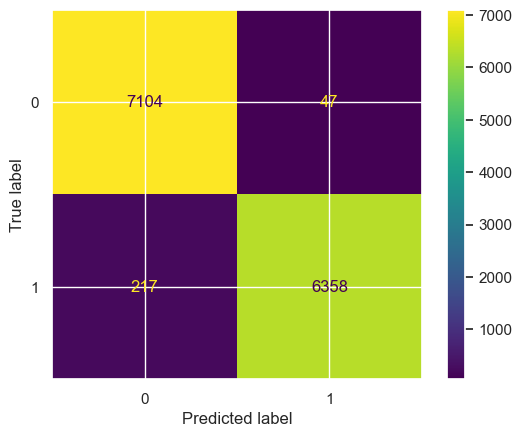

In [37]:
print('Recall Score - Train Set   : ', recall_score(y_train_balanced, y_pred_train_knn), '\n')
print('Classification Report : \n', classification_report(y_train_balanced, y_pred_train_knn), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_best, x_train_balanced, y_train_balanced))

Recall Score - Test Set   :  0.601063829787234 

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       812
           1       0.44      0.60      0.51       188

    accuracy                           0.78      1000
   macro avg       0.67      0.71      0.68      1000
weighted avg       0.81      0.78      0.79      1000
 

Confusion Matrix      : 


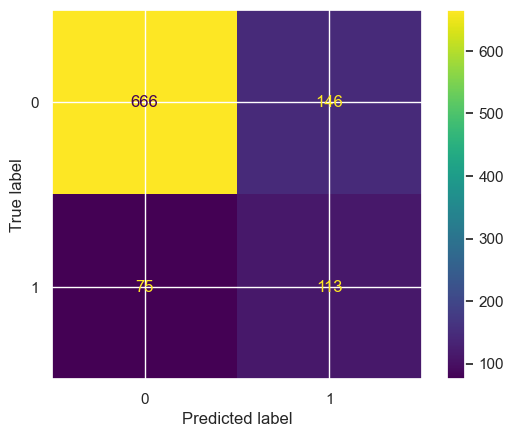

In [39]:
y_pred_test_knn = knn_best.predict(x_test_final)

print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test_knn), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_knn), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_best, x_test_final, y_test))

As we can see, the model got 97% recall score on train data and 60% on test data

### Pipeline Best Model

In [41]:
# Creating Pipeline for preprocessing and predicting using best model

clf = Pipeline(
    steps=[('preprocessor',preprocessor),('classifier',knn_best)]
)

# x. Conclusion

Based on notebook we have done. we got some conclusion:
- Dataset we got is about customer Exited(Churn) in NGAB Bank.
- We focusing on recall on modelling because we want the model identify how many customer will churn which means we want to minimize False negative in our data
- We use many Model for our predict because we want to get the best model for our data. and we got K Nearest Neighbor with 97% of recall score which means the model has 97% good predict


### Future Improvement

- Apply different method for Scaling like Minmaxscaler or something.
- Apply  different method for Encoding like Onehotencoder or something.
- Apply different method for balancing like SMOTE or something.
- Apply different method for modelling because there's so many model on Scikit-Learn
- Apply different method for hyperparameter tuning on the others model

# xi. Model Saving

In [42]:
with open('pipe_model.pkl', 'wb') as file_1:
  joblib.dump(clf, file_1)